In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Review
* How are dilate and erode calculated?
  * What's a structuring element?
* Give a brief explanation of what each channel in the HSV colorspace represents
  * Add an example of how that channel is used to isolate objects or features
* What does the Gaussian function look like (draw it) and how does sigma affect its shape?
  * What effect does this have on the strength of the blur effect?
* Describe how the blur function is used to implement image sharpening

# Contours

In [2]:
# Skipping preprocessing since the image is already white/black
img = cv2.imread('BlobTest.jpg')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
binary_img = cv2.inRange(hsv_img, (0, 0, 0), (255, 255, 50))

In [3]:
def contours(binary_img, min_area=15):
    contour_list, hierarchy = cv2.findContours(binary_img, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
    return [x for x in contour_list if (cv2.contourArea(x) >= min_area)], hierarchy
    
def draw(img, contour_list):
    width = img.shape[0]
    height = img.shape[1]
    output_img = np.copy(img)
    ct_only = np.zeros_like(img)
    x_list = []
    y_list = []
    for contour in contour_list:
        cv2.drawContours(ct_only, contour, -1, color = (255, 255, 255), thickness = 2)

        rect = cv2.minAreaRect(contour)
        center, size, angle = rect
        center = tuple([int(dim) for dim in center]) # Convert to int so we can draw

        # Draw rectangle and circle
        cv2.drawContours(output_img, [cv2.boxPoints(rect).astype(int)], -1, color = (0, 0, 255), thickness = 2)
        cv2.circle(output_img, center = center, radius = 3, color = (0, 0, 255), thickness = -1)

        x_list.append((center[0] - width / 2) / (width / 2))
        x_list.append((center[1] - width / 2) / (width / 2))
        
    
    return output_img, ct_only


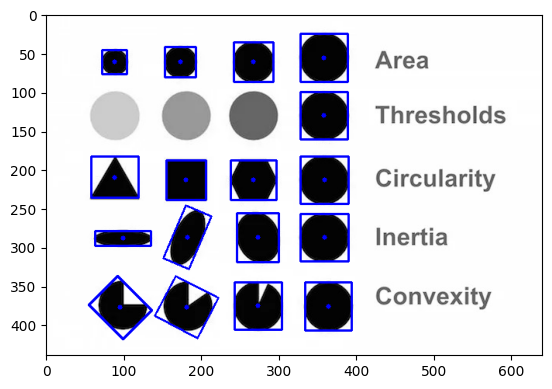

In [4]:
cts, h = contours(binary_img)
labeled_img, contour_img = draw(img, cts)
plt.imshow(labeled_img)

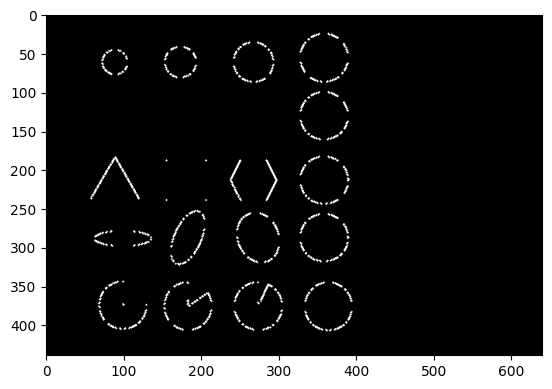

In [5]:
plt.imshow(contour_img)

# Lab
`webcam_detect.py`, distributed with this notebook, pairs the code in this notebook with a mainloop that pulls images from the webcam.

1. First, verify that your webcam works. Modify the "cap = cv2.VideoCapture(1)" line if you get a message about the camera not being found. Try 0 instead of 1.
2. Pick an object in the room with distinct properties. If you don't have anything suitable, try print one.
3. Modify preprocess to use a combination of filters to isolate the target object. An ideal filter set...
  * Has white pixels over the target, and black pixels everywhere else
  * Eliminates all stray white pixels
  * Correctly recognizes the object even if the environment changes, eg lighting
  * Recognizes multiples of the same object if they are close together, rather than one big box.
4. How did your filter do? What changes to the environment cause it to fail?

# HW
Modify webcam_detect.py or this notebook as you please for this step.

1. In any image editor (try even the drawing tools in gdocs) create an image that has a "U", box, and equilateral triangle of different sizes, and are white against a black background. Find the contours of these shapes, and use the contour data to identify WHICH shape is which..

2. Modify your code if necessary to identify the shapes if they are different sizes.